In [23]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Média: 49.77
Mediana: 49.51
Moda: 22.84


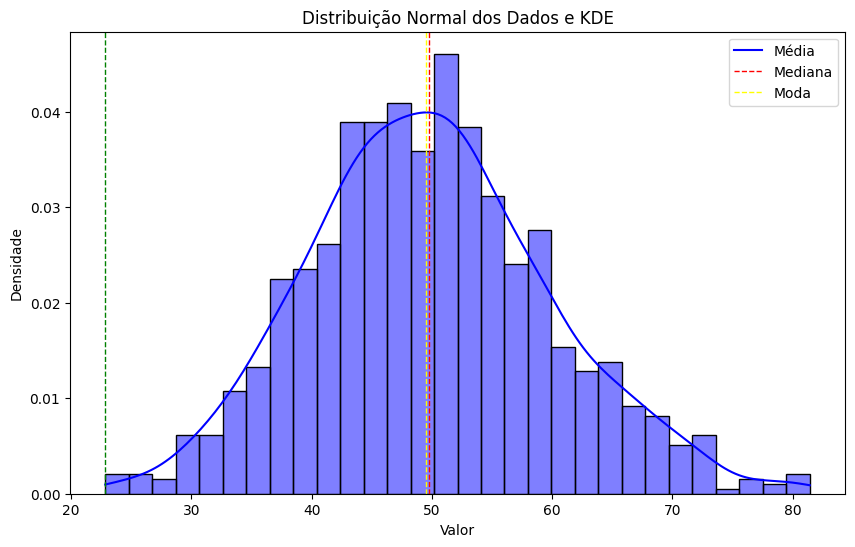

In [6]:
# Gerando um conjunto de dados que segue uma distribuição normal
dados = np.random.normal(loc=50, scale=10, size=1000)  # Média 50, desvio padrão 10

# Calculando a média
media = np.mean(dados)

# Calculando a mediana
mediana = np.median(dados)

# Calculando a moda
moda = pd.Series(dados).mode()[0]

# Imprimindo os resultados
print(f"Média: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Moda: {moda:.2f}")

# Visualizando os dados em um histograma e gráfico KDE
plt.figure(figsize=(10, 6))
sns.histplot(dados, bins=30, kde=True, color='blue', edgecolor='black', stat="density")
plt.axvline(media, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mediana, color='yellow', linestyle='dashed', linewidth=1)
plt.axvline(moda, color='green', linestyle='dashed', linewidth=1)
plt.legend({'Média': media, 'Mediana': mediana, 'Moda': moda})
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.title('Distribuição Normal dos Dados e KDE')
plt.show()


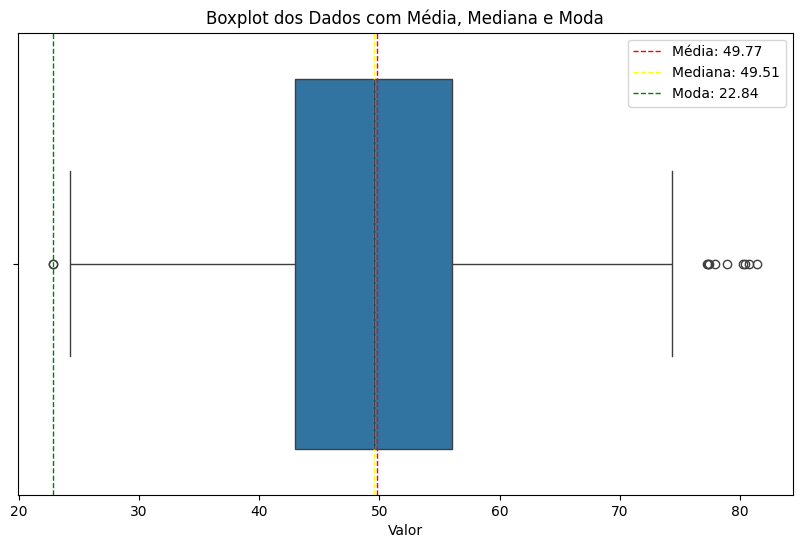

In [7]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(x=dados) 
plt.axvline(media, color='red', linestyle='dashed', linewidth=1, label=f'Média: {media:.2f}') 
plt.axvline(mediana, color='yellow', linestyle='dashed', linewidth=1, label=f'Mediana: {mediana:.2f}')
plt.axvline(moda, color='green', linestyle='dashed', linewidth=1, label=f'Moda: {moda:.2f}')
plt.xlabel('Valor') 
plt.title('Boxplot dos Dados com Média, Mediana e Moda') 
plt.legend() 
plt.show()

In [8]:
dados_series = pd.Series(dados)
dados_series_zscore = dados_series.apply(lambda x: (x-dados_series.mean())/dados_series.std())
display(dados_series_zscore)
print(dados_series[dados_series_zscore.apply(lambda x: abs(x) > 3)])


0      0.383567
1      1.180370
2      1.015132
3      2.007552
4      0.987808
         ...   
995    1.247629
996   -1.404638
997   -1.974524
998    0.000567
999    0.474893
Length: 1000, dtype: float64

113    80.403587
236    80.262131
632    81.437262
950    80.732769
dtype: float64


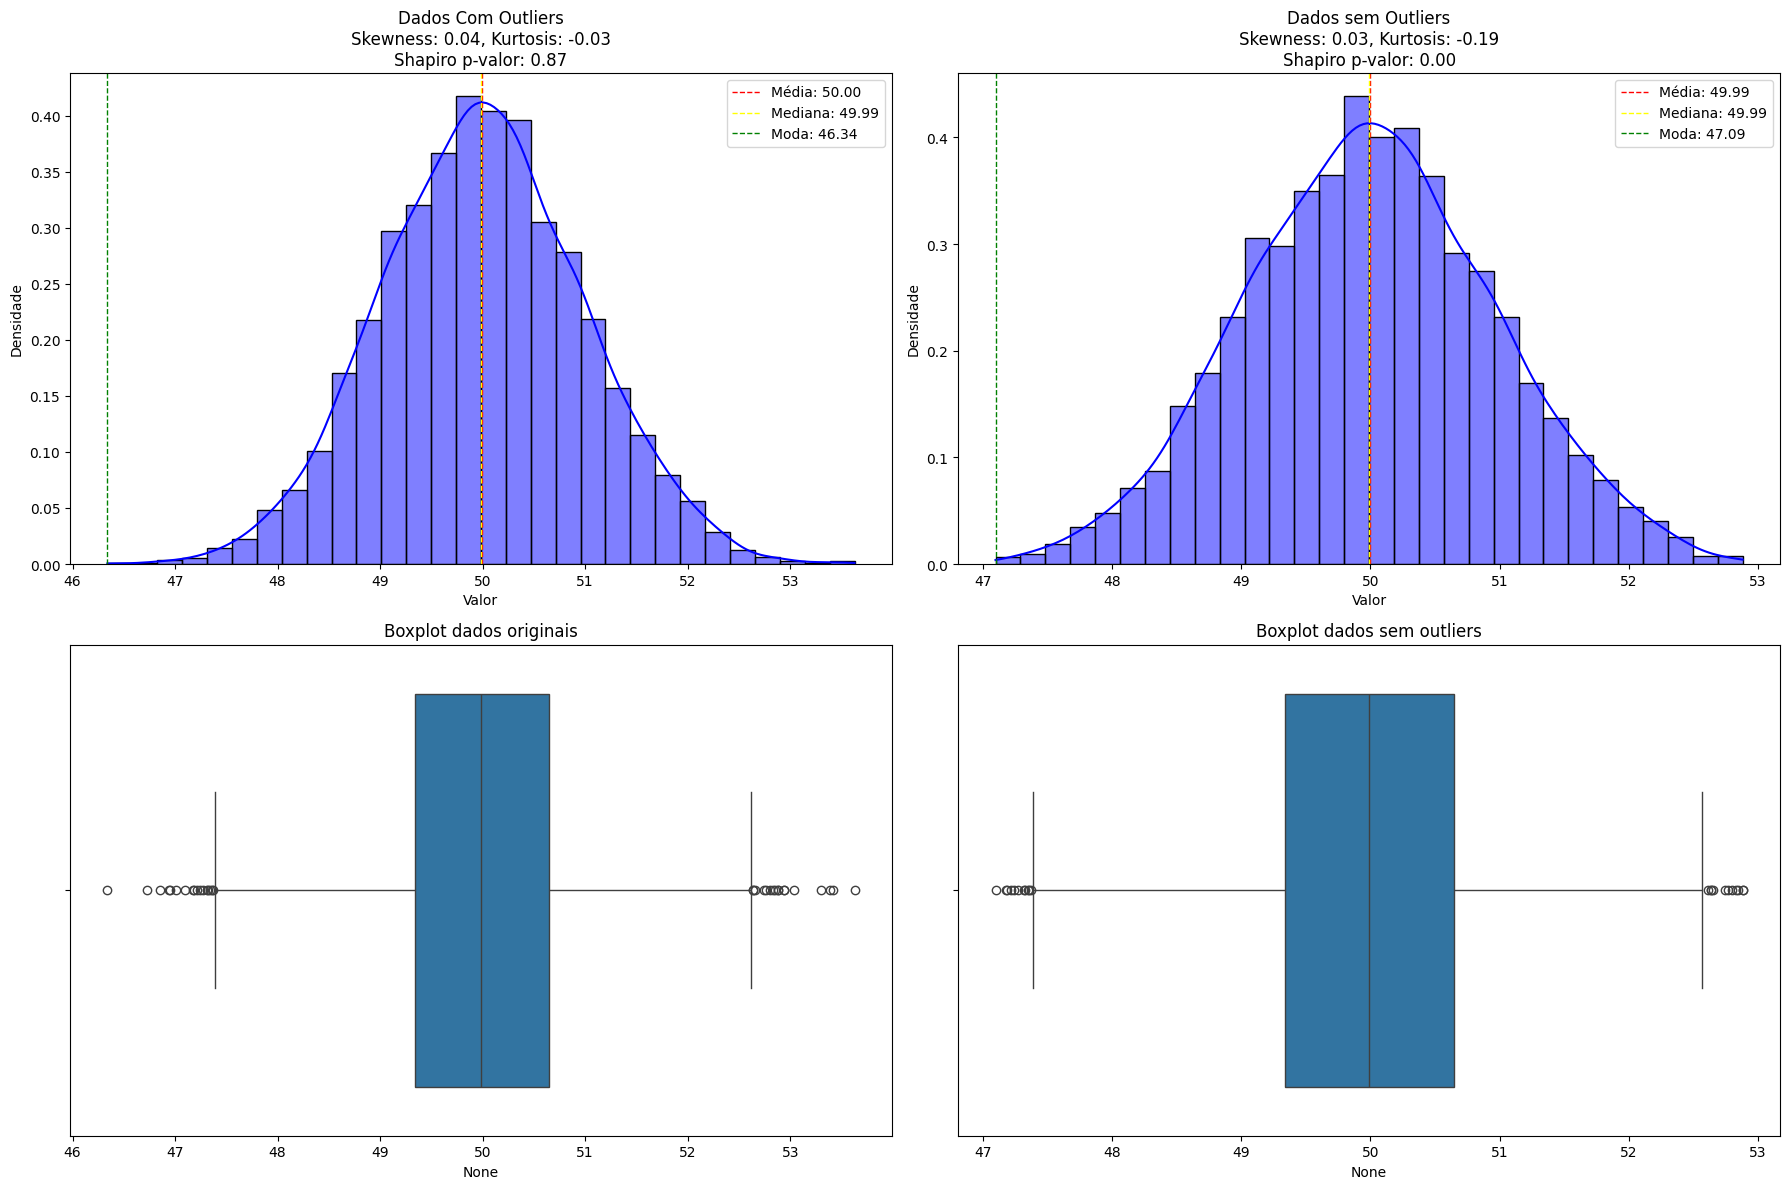

In [9]:

import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, norm, shapiro

# Geramos um conjunto de dados normalmente distribuído
dados = np.random.normal(loc=50, scale=1, size=5000) 

# Convertendo para série `pandas`
dados_series = pd.Series(dados) 

# Calcula o z-score automaticamente e observa outliers
dados_series_zscore = dados_series.apply(lambda x: (x - dados_series.mean()) / dados_series.std())
dados_sem_outliers = dados_series[dados_series_zscore.apply(lambda x: abs(x) <= 3)]


# Calculando a Skew e Kurtosis
skew_orig = skew(dados_series)
kurt_orig = kurtosis(dados_series)

skew_clean = skew(dados_sem_outliers)
kurt_clean = kurtosis(dados_sem_outliers)

# Teste de normalidade
shapiro_orig = shapiro(dados_series)
shapiro_clean = shapiro(dados_sem_outliers)

# Visualizar
plt.figure(figsize=(18, 12))
# Plot origem dados com outliers
plt.subplot(2, 2, 1)
sns.histplot(dados_series, bins=30, kde=True, color='blue', edgecolor='black', stat="density")
plt.axvline(dados_series.mean(), color='red', linestyle='dashed', linewidth=1, label=f'Média: {dados_series.mean():.2f}')
plt.axvline(dados_series.median(), color='yellow', linestyle='dashed', linewidth=1, label=f'Mediana: {dados_series.median():.2f}')
plt.axvline(pd.Series(dados_series).mode()[0], color='green', linestyle='dashed', linewidth=1, label=f'Moda: {pd.Series(dados_series).mode()[0]:.2f}')
plt.legend()
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.title(f'Dados Com Outliers\nSkewness: {skew_orig:.2f}, Kurtosis: {kurt_orig:.2f}\nShapiro p-valor: {shapiro_orig[1]:.2f}')

# Dados sem outliers
plt.subplot(2, 2, 2)
sns.histplot(dados_sem_outliers, bins=30, kde=True, color='blue', edgecolor='black', stat="density")
plt.axvline(dados_sem_outliers.mean(), color='red', linestyle='dashed', linewidth=1, label=f'Média: {dados_sem_outliers.mean():.2f}')
plt.axvline(dados_sem_outliers.median(), color='yellow', linestyle='dashed', linewidth=1, label=f'Mediana: {dados_sem_outliers.median():.2f}')
plt.axvline(pd.Series(dados_sem_outliers).mode()[0], color='green', linestyle='dashed', linewidth=1, label=f'Moda: {pd.Series(dados_sem_outliers).mode()[0]:.2f}')
plt.legend()
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.title(f'Dados sem Outliers\nSkewness: {skew_clean:.2f}, Kurtosis: {kurt_clean:.2f}\nShapiro p-valor: {shapiro_clean[1]:.2f}')

plt.subplot(2, 2, 3)
# Original
sns.boxplot(x=dados_series)
plt.title('Boxplot dados originais')

plt.subplot(2, 2, 4)
# Sem outliers
sns.boxplot(x=dados_sem_outliers)
plt.title('Boxplot dados sem outliers')

plt.tight_layout()
plt.show()




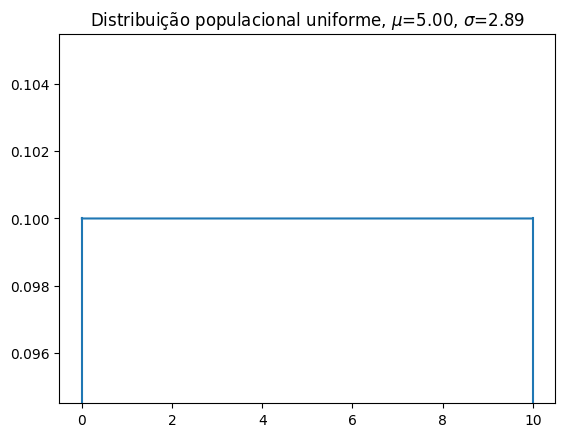

In [10]:
a, b = 0, 10

mu = (a+b)/2
sigma = (b-a)/np.sqrt(12)

plt.title(f"Distribuição populacional uniforme, $\mu$={mu:.2f}, $\sigma$={sigma:.2f}")
x = np.linspace(a, b, 10000)
y = np.ones(10000)/(b-a)

plt.plot(x, y)

plt.axvline(x=a, ymax=0.5)
plt.axvline(x=b, ymax=0.5)

plt.show()

In [11]:
n = 30
N_amostras = 100000
medias_amostrais = []
for _ in range(N_amostras):
    amostra = np.random.uniform(low=a, high=b, size=n)
    media_amostral = amostra.mean()
    medias_amostrais.append(media_amostral)
medias_amostrais

[np.float64(4.921756723689372),
 np.float64(5.07292461214646),
 np.float64(6.057576797107157),
 np.float64(5.638134523272433),
 np.float64(5.479414044290776),
 np.float64(5.609028985365847),
 np.float64(5.335546593268952),
 np.float64(4.246434012076283),
 np.float64(5.084122942819181),
 np.float64(5.49834922026311),
 np.float64(5.194695656475441),
 np.float64(5.102496515429775),
 np.float64(4.630253562775088),
 np.float64(4.858805983811478),
 np.float64(5.5410999189552586),
 np.float64(4.846887462602855),
 np.float64(4.9870215981467245),
 np.float64(5.410975093981677),
 np.float64(5.0678965078801115),
 np.float64(5.199598638937615),
 np.float64(5.04014629339142),
 np.float64(4.908067439984123),
 np.float64(5.904749602585563),
 np.float64(5.290492868511305),
 np.float64(5.105208674100595),
 np.float64(5.112434867972905),
 np.float64(4.887361153037033),
 np.float64(5.261637626631595),
 np.float64(4.434368150430811),
 np.float64(4.786156447414331),
 np.float64(4.73561728530957),
 np.float

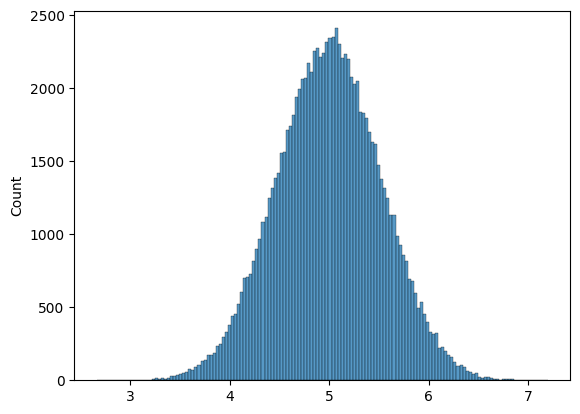

In [12]:
sns.histplot(medias_amostrais);

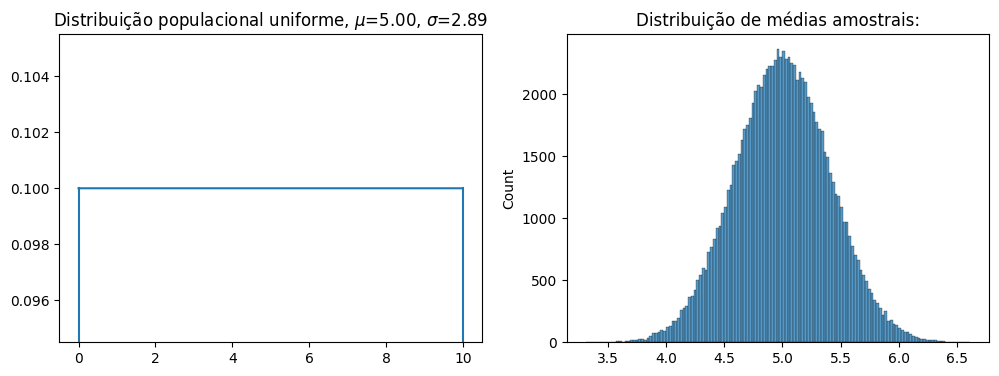

Média populacional: 5.0; média de médias amostrais: 5.000617237601771; erro: 0.00062

Desvio padrão populacional: 2.886751; SE de médias amostrais: 0.408612; sigma/sqrt(n): 0.41 erro: 0.00036


In [13]:
a, b = 0, 10

mu = (a+b)/2
sigma = (b-a)/np.sqrt(12)

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.title(f"Distribuição populacional uniforme, $\mu$={mu:.2f}, $\sigma$={sigma:.2f}")
x = np.linspace(a, b, 10000)
y = np.ones(10000)/(b-a)

plt.plot(x, y)

plt.axvline(x=a, ymax=0.5)
plt.axvline(x=b, ymax=0.5)

# ============================================

n = 30
N_amostras = 100000

medias_amostrais = np.array([np.random.uniform(low=a, high=b, size=n).mean() for _ in range(N_amostras)])

x_barra = medias_amostrais.mean()
SE = medias_amostrais.std()

plt.subplot(122)
plt.title("Distribuição de médias amostrais:")
sns.histplot(medias_amostrais)
plt.show()

# =============================================

print(f"Média populacional: {mu}; média de médias amostrais: {x_barra}; erro: {np.abs(x_barra-mu):.5f}\n")
print(f"Desvio padrão populacional: {sigma:2f}; SE de médias amostrais: {SE:2f}; sigma/sqrt(n): {(sigma/np.sqrt(n)):.2f} erro: {np.abs(SE-(sigma/np.sqrt(n))):.5f}")

## Distribuição Gama
$$ f(x) = \frac{\beta^\alpha x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)} $$

$$ \mu = \frac{\alpha}{\beta} $$

$$ \sigma = \frac{\sqrt{\alpha}}{\beta} $$

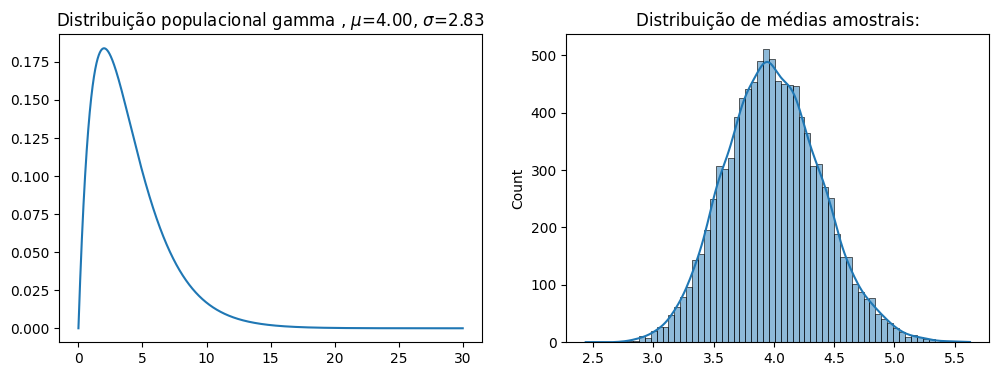

In [37]:
a, b = 2, 1/2

mu = a/b
sigma = np.sqrt(a)/b
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.title(f"Distribuição populacional gamma , $\mu$={mu:.2f}, $\sigma$={sigma:.2f}")

x = np.linspace(0,30,10000)
y = ((b**a) * (x ** (a-1)) * np.exp(-b*x)) / scipy.special.gamma(a)

plt.plot(x,y);

n = 50
nAmostras = 10000

medias_amostrais = np.array([np.random.gamma(shape=a, scale=1/b, size=n).mean() for _ in range(nAmostras)])

x_barra = medias_amostrais.mean()
se = medias_amostrais.std()

plt.subplot(122)
plt.title("Distribuição de médias amostrais:")
sns.histplot(medias_amostrais, kde=True)
plt.show()

# Distribuição exponencial  (Decaimento) 

$$f(x) = \left\{\begin{matrix}
\lambda e^{-\lambda x} \ ,  & x \geq 0\\
0 \ , & x <0
\end{matrix}\right.$$


$$ \mu = \frac{1}{\lambda} $$

$$ \sigma = \frac{1}{\lambda} $$

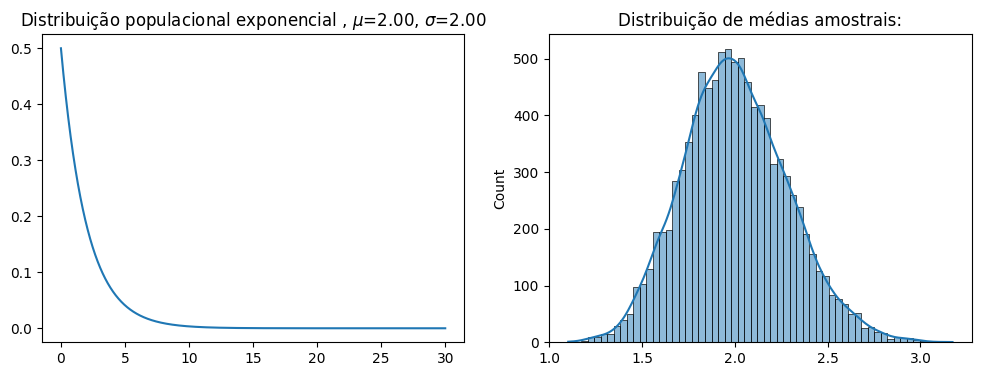

In [38]:
l = 0.5
mu = 1/l
sigma = mu
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.title(f"Distribuição populacional exponencial , $\mu$={mu:.2f}, $\sigma$={sigma:.2f}")

x = np.linspace(0,30,10000)
y = l * np.exp(-l*x)

plt.plot(x,y);

n = 50
nAmostras = 10000

medias_amostrais = np.array([np.random.exponential(scale=1/l, size=n).mean() for _ in range(nAmostras)])

x_barra = medias_amostrais.mean()
se = medias_amostrais.std()

plt.subplot(122)
plt.title("Distribuição de médias amostrais:")
sns.histplot(medias_amostrais, kde=True)
plt.show()